<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/03_Clustering_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics  import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

1 - Dans scikit-learn, importe le dataset Iris, c'est un grand classique de la data. Il contient 3 espèces de fleurs (des iris) suivant leur longueur et largeur de pétale et de sépale.


In [2]:
#upload dataset iris
from sklearn.datasets import load_iris

#df
iris = load_iris()

# obtenir des infos sur le dataset 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# si on veut print iri depuis sklearn c'est moche mais ça marche

print(iris.keys())
print(iris.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# on peut aussi le récupérer dans seaborn 
df_iris = sns.load_dataset('iris')
df_iris

#On va partir de ce df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


2 -Entraîne ton modèle pour qu’il trouve 3 clusters à partir des 4 colonnes numériques.




In [5]:
# on choisi 3 points aléatoirement
# il va ensuite calculer la distance et ensuite on commence une méthode d'itération pour calculer le centre (barycentre :formé sur la racine grecque barus (lourd) pour désigner un centre)

X = df_iris.drop('species', axis = 1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# entraîner le modele

modelKm = KMeans(n_clusters=3)
modelKm.fit(X)

KMeans(n_clusters=3)

In [7]:
# on obtiens les barycentre
modelKm.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

3 - Produis une visualisation comparant le dataset de base avec les classes générées par le K-means en t’inspirant de cette [image](https://storage.googleapis.com/quest_editor_uploads/PO79NkN6PB5bE0PPlNUb7192bH22AZfN.png).


Tu peux prendre 2 dimensions de ton choix parmi les 4.

- Sur le graphique de gauche, tu dois afficher les points avec des couleurs différentes pour chaque cluster d'appartenance, ainsi que le centre de chaque cluster bien en évidence (ici les croix vertes).
- Sur le graphique de droite, tu dois afficher les points avec des couleurs différentes correspondant à leur espèce d'iris species

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

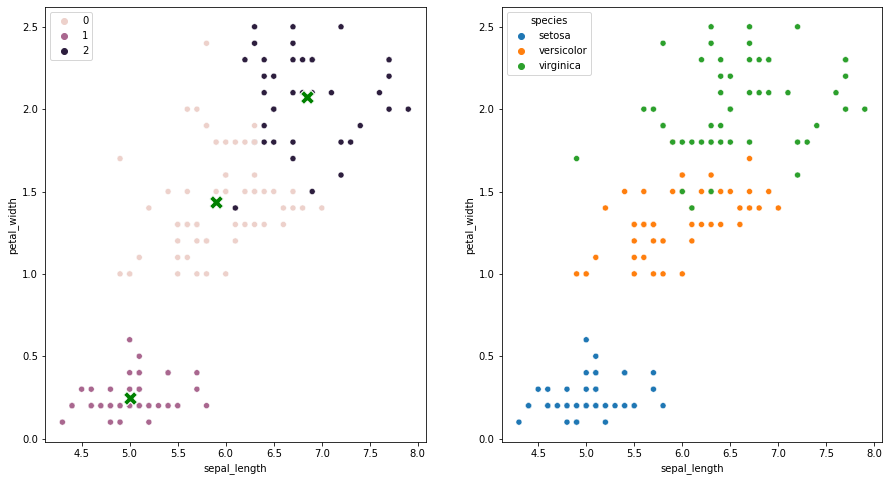

In [8]:
fig, ax = plt.subplots(figsize=(15,8))


ax1 = plt.subplot(121)

# on a choisi les deux variables, le hue c'est les classes
sns.scatterplot(data=df_iris, x='sepal_length', y='petal_width', hue=modelKm.labels_)

# je récupère les coordonnées de colonnes qui m'intéresse
sns.scatterplot(x= modelKm.cluster_centers_[:,0], y=modelKm.cluster_centers_[:,3], marker='X', color = 'green', s=200)



ax2 = plt.subplot(122)
sns.scatterplot(data=df_iris, x='sepal_length', y='petal_width', hue='species') # ce sont les vrais classes

In [9]:
f"En comparant les deux, on s'aperçoit que ça fontionne plutôt bien entre le kmeans et les vrais données"

"En comparant les deux, on s'aperçoit que ça fontionne plutôt bien entre le kmeans et les vrais données"

4 - Entraine un autre modèle sur 2 clusters, puis affiche les mêmes graphiques


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

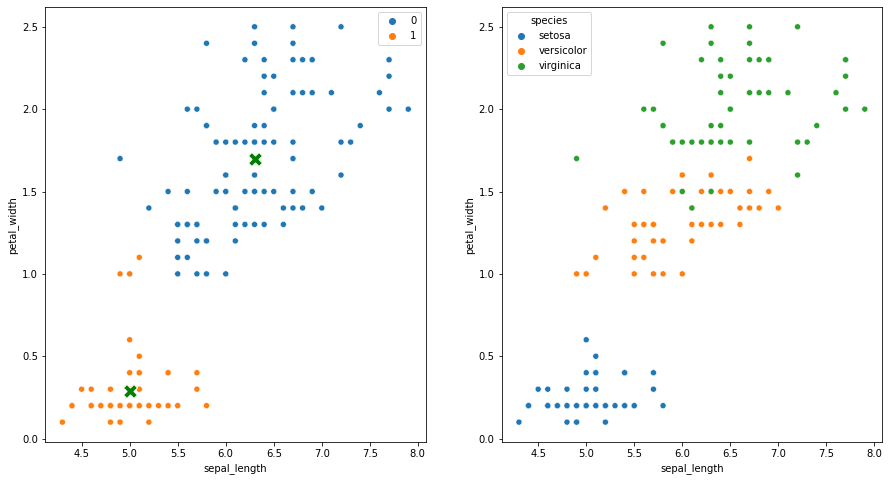

In [10]:
# je mets 2 clusters au lieu de trois, je recréé un modelKm
modelKm2 = KMeans(n_clusters=2)
modelKm2.fit(X)
modelKm2.cluster_centers_

fig, ax = plt.subplots(figsize=(15,8))

ax1 = plt.subplot(121)
# on a choisi les deux variables, le hue c'est les classes
sns.scatterplot(data=df_iris, x='sepal_length', y='petal_width', hue=modelKm2.labels_)
# je récupère les coordonnées de colonnes qui m'intéresse
sns.scatterplot(x= modelKm2.cluster_centers_[:,0], y=modelKm2.cluster_centers_[:,3], marker='X', color = 'green', s=200)

ax2 = plt.subplot(122)
sns.scatterplot(data=df_iris, x='sepal_length', y='petal_width', hue='species') # ce sont les vrais classes

5 - Idem pour 4 clusters


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

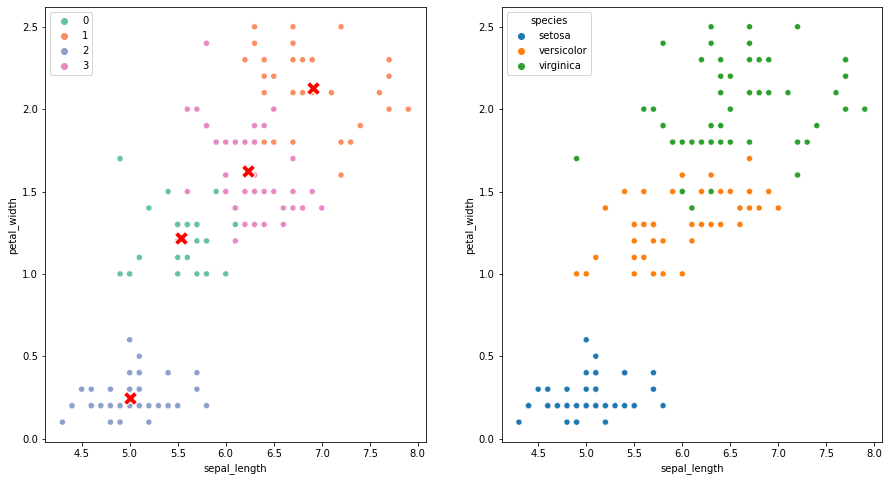

In [11]:
# je mets 4 clusters au lieu de trois, je recréé un modelKm
modelKm3 = KMeans(n_clusters=4)
modelKm3.fit(X)
modelKm3.cluster_centers_

fig, ax = plt.subplots(figsize=(15,8))

ax1 = plt.subplot(121)
sns.scatterplot(data=df_iris, x='sepal_length', y='petal_width', hue=modelKm3.labels_, palette='Set2')
sns.scatterplot(x= modelKm3.cluster_centers_[:,0], y=modelKm3.cluster_centers_[:,3], marker='X', color = 'red', s=200)

ax2 = plt.subplot(122)
sns.scatterplot(data=df_iris, x='sepal_length', y='petal_width', hue='species')

6 - Évalue ton modèle en utilisant la méthode Elbow, entre 2 et 10 clusters, quel nombre cluster semble optimal ?


######**Méthode elbow**

C'est une méthode visuelle.

On fait varier le nombre de clusters et on cherche le coude (elbow en anglais), sur un graphique représentant l'inertie.

C'est une méthode visuelle mais pas très précise


In [12]:
#Méthode elbow

liste = [] #pour stocker le résultat 

for i in range(2,11) :
  model = KMeans(n_clusters=i)
  model.fit(X)
  liste.append(model.inertia_)


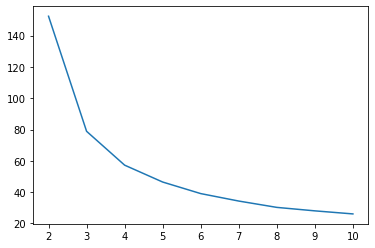

In [13]:
#graph for elbow method

plt.plot(range(2,11), liste)
plt.show()

7 - Évalue ton modèle en utilisant la méthode Silhouette, entre 2 et 10 clusters, quel nombre de clusters semble optimal ? Et toi, visuellement, si tu ne savais pas qu'il y avait 3 espèces, tu en aurais trouvé combien ?


######**Méthode Silhouette**

Le score Silhouette est plus précis. Chaque point obtient un score entre -1 et 1.

-1 : le point est très mal placé, il devrait sans doute être dans un autre cluster

0 : il y a hésitation dans le cluster d'appartenance (2 clusters ou plus sont à la même distance)

1 : le point est au même endroit que le centre d'un cluster

On calcule ensuite la moyenne de l'ensemble des scores. S'il est proche de 1, tous les points sont très proches de leur clusters.

Plus le ratio de la silhouette est important mieux c'est

In [14]:
# Ici, nous faisons une boucle pour afficher le score Silhouette
# pour un nombre de clusters entre 2 et 10

liste2 = []
for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(X)
    liste2.append(silhouette_score(X, model.labels_))

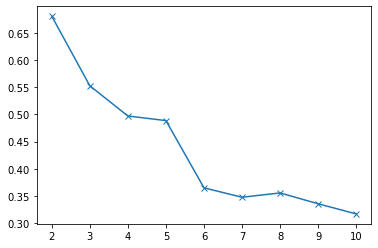

In [15]:
#graph for Silhouette method

plt.plot(range(2,11), liste2, 'x-')
plt.show()

In [16]:
f"Si je ne savais pas qu'il y en avait 3, j'en aurais trouvé 2"

"Si je ne savais pas qu'il y en avait 3, j'en aurais trouvé 2"